In [1]:
import sympy
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
import nashpy

In [2]:

class eq():
    def __init__(self):
        points = 101
        self.x,step = np.linspace(0,1,points,retstep=True)        
        
        
        #--- Symbolic symbols used in expected utility functions
        # n, PR,C_r, D, p_a, B, pi, C_v, p_v, C_e, C_d, p_e
        self.n, self.PR, self.C_r, self.D, self.r = sympy.symbols('n PR C_r D r', real=True)
        self.p_a, self.B, self.pi, self.C_v,  = sympy.symbols('p_a B pi C_v', real=True)
        self.C_e, self.C_d = sympy.symbols('C_e C_d', real=True)
        
        self.se = sympy.symbols('sigma_e', real=True)
        self.sv = sympy.symbols('sigma_v', real=True)
        
        
    def findNashEq(self, n, PR, p_a, B, pi, C_v, C_r, C_e, C_d):
        '''This function solves for the mixed strategy of the JC and RP. 
        sigma_e : the probability that the RP will execute the job
        1-sigma_e: the probability that the RP will not execute the job
        sigma_v: the probability that the JC will verify the result
        1-sigma_v: the probability that the JC will not verify the result'''
#         n, PR,C_r, D, p_a, B, pi, C_v, p_v, C_e, C_d, p_e
        
        
        
        
        D = pi*(PR + n)
        
        # J1 and J3, JC verifies
        # J2 and J4, JC does not verify
        J1,J2,J3,J4 = self.JCU(n, D, p_a, B, pi, C_v, C_r)
        
        # Ev: JC's expected value for verifying the result
        Ev = sigma_e*J1 + (1-sigma_e)*J3
        print("E[v]")
        display(Ev)
        # Ep: JC's expected value for not verifying the result
        Ep = sigma_e*J2 + (1-sigma_e)*J4 
        # RP solves for sigma_e such that the JC is ambivalent between verifying and not verifying by setting the two expected values equal to each other
        nse = sympy.solve([Ev - Ep], [sigma_e])[sigma_e]
        
        # Substitute nse(nash equlibrium sigma_e) back in to JC's expected utility function
        print("E[v] with nse")
        Evne = nse*J1 + (1-nse)*J3
        display(Evne.expand().simplify())
        
        # R1 and R2, RP executes 
        # R3 and R4, RP does not execute
        R1,R2,R3,R4 = self.RPU(n, D, p_a, pi, C_e, C_d)
        # Ee: RP's expected value for executing the job
        Ee = sigma_v*R1 + (1-sigma_v)*R2
        print("E[e]")
        display(Ee)
        # Ed: RP's expected value for sending a deceiving result
        Ed = sigma_v*R3 + (1-sigma_v)*R4
        # JC solve sor sigma_v such that the RP is ambivalent between executing and deceiving 
        nsv = sympy.solve([Ee - Ed], [sigma_v])[sigma_v]
        
        
        # Verify that when substituting nse back in the JC expected values are equal.
        check_e = nse*J1 + (1-nse)*J3 - ( nse*J2 + (1-nse)*J4 )
        print("e is equilibrium: {}, check is {}".format(check_e.simplify()==sympy.numbers.Zero, check_e.simplify()))
        
        
        return nse, nsv
        
    def JCU(self, n, D, r, p_a, B, pi, C_v, C_r):
        '''The JC's utility functions'''
        J1 = p_a*(B-pi-C_v) + (1-p_a)*( (p_a**n)*(B+r-C_v) + (1-p_a**n)*(B-D-C_r-C_v))
        J2 = B - pi
        J3 = (p_a**n)*(r-C_v) + (1-p_a**n)*(-C_r-C_v-D)
        J4 = -pi
        
        return J1, J2, J3, J4
    
#     def RPU(self, p_a, pi, C_e, C_d, n, D):
    def RPU(self, n, D, r, p_a, pi, C_e, C_d):
        '''The RP's utility functions'''
        R0 = p_a*(pi-C_e) + (1-p_a)*( (p_a**n)*(-C_e-D) + (1-p_a**n)*(r-C_e))
        R1 = pi - C_e
        R2 = (p_a**n)*(-C_d-D) + (1-p_a**n)*(r-C_d)
        R3 = pi-C_d
        
        return R0, R1, R2, R3
    
        

In [3]:
e = eq()

# Resource Provider

In [4]:

D = e.pi*(e.PR + e.n)
r = e.pi

RU = e.RPU(e.n, D, r, e.p_a, e.pi, e.C_e, e.C_d)
# for ix, u in enumerate(RU):
#     print("RU: {}".format(ix))
#     display(u)
    
# left
display(RU[0].expand().collect(e.p_a*e.p_a**e.n*e.pi)) # up
display(RU[2].expand()) # down

# shared = -e.C_e  -e.D*e.p_a**e.n - e.p_a**e.n*e.r + e.r
# shared = -e.C_e  -e.PR*e.p_a**e.n*e.pi - e.n*e.p_a**e.n*e.pi - e.p_a**e.n*e.r + e.r
shared = -e.C_e  -e.PR*e.p_a**e.n*e.pi - e.n*e.p_a**e.n*e.pi - e.p_a**e.n*e.pi + e.pi

display((RU[0].expand() - shared).collect(e.p_a).collect(e.p_a**e.n).collect(e.pi))
display(RU[2].expand() - shared)


# right
display(RU[1]) # up
display(RU[3]) # down*

-C_e - PR*p_a**n*pi - n*p_a**n*pi + p_a*p_a**n*pi*(PR + n + 1) - p_a**n*pi + pi

-C_d - PR*p_a**n*pi - n*p_a**n*pi - p_a**n*pi + pi

p_a*p_a**n*pi*(PR + n + 1)

-C_d + C_e

-C_e + pi

-C_d + pi

|    &nbsp;     | left(verify)  <img width=370/> | right(pass) |
|---------------|--------------------------------|-------------|
| up(execute)   | $- C_{e} - PR p_{a}^{n} \pi - n p_{a}^{n} \pi + p_{a} p_{a}^{n} \pi \left(PR + n + 1\right) - p_{a}^{n} \pi + \pi$ | $- C_{e} + \pi$ |
| down(deceive)  | $- C_{d} - PR p_{a}^{n} \pi - n p_{a}^{n} \pi - p_{a}^{n} \pi + \pi$  | $- C_{d} + \pi$ |

simplified decision layout (remove terms common to top and bottom): 

|    &nbsp;     | left(verify)  <img width=200/>    | right(pass) |
|---------------|-----------------------------------|-------------|
| up(execute)   | $p_a^{n+1} \pi (PR+n+1) - C_e$ \*\*|  $-C_e$     |
| down(deceive) | $-C_d$                            |  $-C_{d}$ \*   |


Given:
1. $PR \geq 0$
1. $n \geq 1$, otherwise there is no point in performing mediation
1. $C_e-C_d > 0$, otherwise the RP will never deceive since it is more expensive than executing. 
1. $\pi \geq \pi_{RP} \geq C_e$, because if $C_e > \pi_{RP}$ RP aborts, and $\pi_{RP} > \pi$ is disallowed by the contract


for **right** it will always choose **down**.

for **left** it will choose **up** if: 

$p_a^{n+1} \pi (PR+n+1) > C_e-C_d$


So, if
1. $p_a = 0$ then RP will choose down
1. $p_a = 1$ then the incentive to choose up is at least $2\pi$, since $2\pi < \pi (PR+n+1)$, and the incentive to choose down is at most $C_e$ (if $C_d=0$), and if $C_e<2\pi$ then RP will choose **up** (regardless of $PR$, $n$, and $C_d$). We know that $C_e<\pi$ so if $p_a = 1$ RP will choose **up**.
1. $0< p_a< 1$ then since $\pi > C_e$, as long as $(PR+n+1) \times p_a^{n+1}> 1$ RP will choose **up**

Simplifying this says:

$p_a^{n+1}> \frac{1}{PR+n+1}$ and $\frac{1}{PR+n+1}$ is at most $\frac{1}{2}$ so:

$p_a^{n+1} > \frac{1}{2}$ ensures that RP will choose **up**. *This makes bullet 2 unnecessary*

ANOTHER WAY TO REACH THE SAME CONCLUSION

Since

$2\pi < \pi (PR+n+1)$ and $\pi > C_e$ then inserting these in our up/left criteria we find:

if $\Big\{p_a^{n+1} \pi (PR+n+1) > p_a^{n+1} 2\pi\Big\} > \Big\{\pi > C_e > C_e-C_d\Big\}$

which simplifies our criteria to 

$p_a^{n+1} 2\pi > \pi$

which simplifies to 

$p_a^{n+1} > \frac{1}{2}$ 

So as long as $p_a^{n+1} > \frac{1}{2}$, regardless of the other parameters RP will choose **up** because lhs is smaller than it would be and rhs is bigger than it would be. 

See plot below. Values in top right result in RP choosing up. 

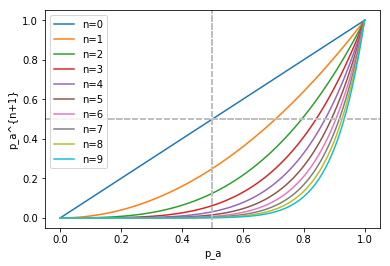

In [5]:

for n in range(0,10, 1):
    plt.plot(e.x, e.x**(n+1), label="n={}".format(n))
    plt.xlabel("p_a")
    plt.ylabel("p_a^{n+1}")
    plt.axhline(y=.5, color='0.75', linestyle='dashed')
    plt.axvline(x=.5, color='0.75', linestyle='dashed')
    plt.legend()

# Job Creator

In [6]:
D = e.pi*(e.PR + e.n)
r = e.pi

JU = e.JCU(e.n, D, r, e.p_a, e.B, e.pi, e.C_v, e.C_r)
# JU = e.JCU(e.n, e.D, e.r, e.p_a, e.B, e.pi, e.C_v, e.C_r)
# for ix, u in enumerate(JU):
#     print("JU: {}".format(ix))
#     display(u)
    
# up (execute)
# display(JU[0].expand()) # left(verify)
# display(JU[1].expand()) # right(pass)

shared = e.B + e.pi - 2*e.p_a*e.pi


# display((JU[0].expand()).collect(e.C_r).collect(e.PR*e.pi).collect(e.n*e.pi))
display((JU[1].expand() - shared).collect(e.pi))


# down

display(JU[2].expand().collect(e.C_r).collect(e.PR*e.pi).collect(e.n*e.pi))
# display(JU[3].expand())

ul = e.B-e.C_v+(e.C_r+e.PR*e.pi+e.n*e.pi+e.pi)*(-e.p_a*e.p_a**e.n+e.p_a+e.p_a**e.n-1)+e.pi*(-2*e.p_a+1)
display(ul)

dl = (e.C_r+e.PR*e.pi+e.n*e.pi+e.pi)*(e.p_a**e.n-1) - e.C_v + e.pi

(dl - JU[2]).expand()

pi*(2*p_a - 2)

C_r*(p_a**n - 1) - C_v + PR*pi*(p_a**n - 1) + n*pi*(p_a**n - 1) + p_a**n*pi

B - C_v + pi*(1 - 2*p_a) + (C_r + PR*pi + n*pi + pi)*(-p_a*p_a**n + p_a + p_a**n - 1)

0

**Job Creator payouts**

|    &nbsp;     | left(verify)  <img width=470/> | right(pass) |
|---------------|--------------------------------|-------------|
| up(execute)   | $B - C_v + (C_r+PR\pi+n\pi+\pi)\left(- p_{a} p_{a}^{n} + p_{a} + p_{a}^{n} - 1\right) + \pi(-2p_{a}+1)$ | $B - \pi$      |
| down(deceive) | $- C_{v} + \pi + \left(p_{a}^{n} - 1\right) \left(C_{r} + PR \pi + n \pi + \pi\right)$                         | $-\pi$      |





RP chooses **UP**

JC chooses **left** if:

$B - C_v + (C_r+PR\pi+n\pi+\pi)\left(- p_{a} p_{a}^{n} + p_{a} + p_{a}^{n} - 1\right) + \pi(-2p_{a}+1) > B-\pi$

simplify

$- C_v + (C_r+PR\pi+n\pi+\pi)\left(- p_{a} p_{a}^{n} + p_{a} + p_{a}^{n} - 1\right)  > 2\pi(p_{a}-1)$

When is this true? 

Compare 

1. $\left(- p_{a} p_{a}^{n} + p_{a} + p_{a}^{n} - 1\right)$ and $(p_{a}-1)$

See plot below: 

(-0.1, 0.01)

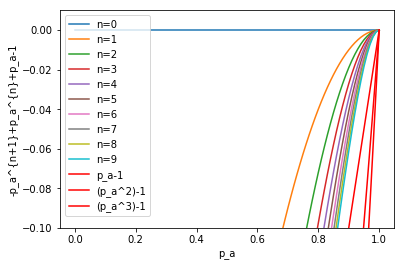

In [7]:
n = 0

for n in range(0,10, 1):
    f = -e.x**(n+1)+e.x**n+e.x-1
    plt.plot(e.x, f, label="n={}".format(n))
    
    plt.xlabel("p_a")
    plt.ylabel("-p_a^{n+1}+p_a^{n}+p_a-1")
#     plt.axhline(y=.5, color='0.75', linestyle='dashed')
#     plt.axvline(x=.5, color='0.75', linestyle='dashed')
     

plt.plot(e.x, e.x-1, label="p_a-1", color='r')  
plt.plot(e.x, (e.x**2)-1, label="(p_a^2)-1",color='r') 
plt.plot(e.x, (e.x**3)-1, label="(p_a^3)-1",color='r') 
plt.legend()
plt.ylim(-.1, 0.01)

for all values of $p_a$, except $p_a=1$, 

$\left(- p_{a} p_{a}^{n} + p_{a} + p_{a}^{n} - 1\right) < 0$, and 

$(p_{a}-1) < 0$ 

We can deduce that 

$\left(- p_{a} p_{a}^{n} + p_{a} + p_{a}^{n} - 1\right) > (p_{a}-1)$, because if we simplify we find that 

$ 1 > p_{a}$, which is true, because it is between 0 and 1.

2. $(C_r+PR\pi+n\pi+\pi)>2\pi$

Since $n>0$  then this is always true.

Combining 1. and 2. we then know that:

$(C_r+PR\pi+n\pi+\pi)\left(- p_{a} p_{a}^{n} + p_{a} + p_{a}^{n} - 1\right) > 2\pi(p_{a}-1)$

is always true. Meaning JC would choose **left**. 

However this does not include $C_v$, which changes the balance. 

If $C_v>0$:

1. if $p_a=0$: $B - C_{r} - C_{v} - PR \pi - n \pi > B - \pi$ always false. JC choose **right**(pass)
2. if $p_a=1$: $B - C_{v} - \pi > B - \pi$ always false. JC choose **right**(pass)
3.  if $0< p_a< 1$. 
    1. If $C_v>2\pi$ the JC chooses **right**(pass)
    1. otherwise see below


We started with : 

$- C_v + (C_r+PR\pi+n\pi+\pi)\left(- p_{a} p_{a}^{n} + p_{a} + p_{a}^{n} - 1\right)  > 2\pi(p_{a}-1)$

Simplify to find $C_v$ breakpoint

$(C_r+PR\pi+n\pi+\pi)\left(- p_{a} p_{a}^{n} + p_{a} + p_{a}^{n} - 1\right) + 2\pi(1-p_{a})  > C_v $

*write out as code and plot below*

In [8]:
uleft = (e.C_r+e.PR*e.pi+e.n*e.pi+e.pi)*(-e.p_a*e.p_a**e.n+e.p_a+e.p_a**e.n-1)+2*e.pi*(1-e.p_a)
display(uleft)

dleft = 2*e.pi + (e.C_r + e.PR*e.pi + e.n*e.pi + e.pi)*(e.p_a**e.n - 1)
display(dleft)

A = sympy.symbols('A', real=True)
uleft_abstract = e.pi*(e.PR+e.n+1)*(-e.p_a*e.p_a**e.n+e.p_a+e.p_a**e.n-1)+2*e.pi*(1-e.p_a)
# display(uleft_abstract)



2*pi*(1 - p_a) + (C_r + PR*pi + n*pi + pi)*(-p_a*p_a**n + p_a + p_a**n - 1)

2*pi + (p_a**n - 1)*(C_r + PR*pi + n*pi + pi)

Text(0.5, 1.0, 'minCv plot')

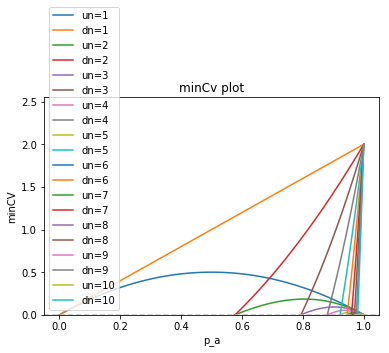

In [9]:
pi = 1
Cr = 0
PR = 0

fu = uleft.subs({e.pi:pi, e.C_r:Cr, e.PR:PR})
fd = dleft.subs({e.pi:pi, e.C_r:Cr, e.PR:PR})

def sub_pa(p_a, f):
    return f.subs({e.p_a:p_a})
    
fun = np.vectorize(sub_pa)

for n in range(1,11,1):
    fu1 = fu.subs({e.n:n})
    fd1 = fd.subs({e.n:n})
    
    minCv_u = fun(e.x, fu1)
    minCv_d = fun(e.x, fd1)
    
    plt.plot(e.x, minCv_u, label="un=%s"%(n))
    plt.plot(e.x, minCv_d, label="dn=%s"%(n))

plt.xlabel("p_a")
plt.ylabel("minCV")
plt.axhline(y=0, color='0.75', linestyle='dashed')
plt.legend()
plt.ylim(0)
plt.title('minCv plot')


# uleft

If $0<C_v<minC_v$ then JC will choose **left** (verify) otherwise it will choose **right** (pass)

**Resource Provider Payouts**


|    &nbsp;     | left(verify)  <img width=370/> | right(pass) |
|---------------|--------------------------------|-------------|
| up(execute)   | $- C_{e} - PR p_{a}^{n} \pi - n p_{a}^{n} \pi + p_{a} p_{a}^{n} \pi \left(PR + n + 1\right) - p_{a}^{n} \pi + \pi$ | $- C_{e} + \pi$ |
| down(deceive)  | $- C_{d} - PR p_{a}^{n} \pi - n p_{a}^{n} \pi - p_{a}^{n} \pi + \pi$  | $- C_{d} + \pi$ |

simplified decision layout (remove terms common to top and bottom): 

|    &nbsp;     | left(verify)  <img width=200/>    | right(pass) |
|---------------|-----------------------------------|-------------|
| up(execute)   | $p_a^{n+1} \pi (PR+n+1) - C_e$ \*\*|  $-C_e$     |
| down(deceive) | $-C_d$ \*                          |  $-C_{d}$ \*   |

\*\* if $p_a^{n+1} > \frac{1}{2}$


**Job Creator payouts**

|    &nbsp;     | left(verify)  <img width=470/> | right(pass) |
|---------------|--------------------------------|-------------|
| up(execute)   | $B - C_v + (C_r+PR\pi+n\pi+\pi)\left(- p_{a} p_{a}^{n} + p_{a} + p_{a}^{n} - 1\right) + \pi(-2p_{a}+1)$ | $B - \pi$      |
| down(deceive) | $- C_{v} + \pi + \left(p_{a}^{n} - 1\right) \left(C_{r} + PR \pi + n \pi + \pi\right)$                         | $-\pi$      |

simplified decision layout (remove common left and right terms, reorder a little)

|    &nbsp;     | left(verify)  <img width=470/>                                | right(pass) <img width=100/> |
|-------------|--------------------------------------------------------------------------------------|-------|
| up(execute) | $ 2\pi(1 - p_{a}) - (C_r+PR\pi+n\pi+\pi)(1 - p_{a} - p_{a}^{n} + p_{a}^{n+1} )$\*\* | $C_v$ \*|
|down(deceive)| $ 2\pi - (C_{r} + PR \pi + n \pi + \pi)(1 - p_{a}^{n})$   \*\*                       | $C_v$ \* |



if **up** : 

\* if $p_a=0$ or $p_a=1$  or if $C_v>2\pi$ choose **right** (won't happen, RP will change to down)

\*\* if $2\pi - C_v > 2\pi p_a + (C_r+PR\pi+n\pi+\pi)(1 - p_{a} - p_{a}^{n} + p_{a}^{n+1}) $ choose **left**

\*\* if $2\pi - 2\pi p_a - (C_r+PR\pi+n\pi+\pi)(1 - p_{a} - p_{a}^{n} + p_{a}^{n+1}) > C_v $ choose **left**


if **down** : 

\* if $p_a=0$ or if $C_v > 2\pi$ choose **right**

\*\* if $p_a=1$ and $2\pi > C_v$ choose **left**

\*\* if $2\pi - C_v > (C_{r} + PR \pi + n \pi + \pi)(1 - p_{a}^{n}) $ choose **left**

\*\* if $2\pi - (C_{r} + PR \pi + n \pi + \pi)(1 - p_{a}^{n}) > C_v $ choose **left**


1. find optimal $p_a$
1. set $PR$ and $n$ to force optimal $p_a^{n+1}>\frac{1}{2}$
1. set $\frac{\pi}{C_v}$ ratio to optimize JU
1. plot mixed nash equilibrium against $p_a$ on x-axis from optimal to 1 and optimal-(1-optimal), or at least highlight/demarcate that region

ur is impossible, since if right then RP will always choose down.

dl is eliminated if we can set $p_a^{n+1} > \frac{1}{2}$, because RP will choose up (execute). 

if $C_v< minC_v^{up} $ (see minCv plot) then ul is a pure strategy. 

Otherwise dr is a pure strategy only if $C_v>minC_v^{down}$,   because otherwise JC will move left (dl), and RP will move up(ul) and JC will move right(ur) and RP will move down (dr). 

 

Can we force $p_a$? 

Is there a MSNE? 

**Job Creator payouts**

|    &nbsp;     | left(verify)  <img width=470/> | right(pass) |
|---------------|--------------------------------|-------------|
| up(execute)   | $B - C_v + (C_r+PR\pi+n\pi+\pi)\left(- p_{a} p_{a}^{n} + p_{a} + p_{a}^{n} - 1\right) + \pi(-2p_{a}+1)$ | $B - \pi$      |
| down(deceive) | $- C_{v} + \pi + \left(p_{a}^{n} - 1\right) \left(C_{r} + PR \pi + n \pi + \pi\right)$                         | $-\pi$      |





In [10]:
ul = e.B-e.C_v+(e.C_r+e.PR*e.pi+e.n*e.pi+e.pi)*(-e.p_a*e.p_a**e.n+e.p_a+e.p_a**e.n-1)+e.pi*(-2*e.p_a+1)
dl = (e.C_r+e.PR*e.pi+e.n*e.pi+e.pi)*(e.p_a**e.n-1) - e.C_v + e.pi
# display((ul - JU[0]).expand())
# display((dl - JU[2]).expand())

# display(ul)
# display(dl)
# display(JU[1])
# display(JU[3])

In [43]:
sigma_e = sympy.symbols('sigma_e', real=True)

JL = sigma_e*ul + (1-sigma_e)*dl
      
JR = sigma_e*JU[1] + (1-sigma_e)*JU[3]
JR.expand()

B*sigma_e - pi

In [47]:
common = -e.p_a*e.p_a**(e.n)*sigma_e + e.p_a*sigma_e + e.p_a**e.n - 1
fJL = (e.B*sigma_e - e.C_v + (e.C_r + e.PR*e.pi + e.n*e.pi +e.pi )*common + e.pi + -2*e.p_a*e.pi*sigma_e)
fJL  + JR.expand()

2*B*sigma_e - C_v - 2*p_a*pi*sigma_e + (C_r + PR*pi + n*pi + pi)*(-p_a*p_a**n*sigma_e + p_a*sigma_e + p_a**n - 1)

In [38]:
dfJL = sympy.diff(fJL,e.p_a)
dfJL

-2*pi*sigma_e + (C_r + PR*pi + n*pi + pi)*(-n*p_a**n*sigma_e + n*p_a**n/p_a - p_a**n*sigma_e + sigma_e)

if down, ie $\sigma_e = 0$, then $p_a=0$

In [50]:
dfJL.subs({sigma_e:0})

n*p_a**n*(C_r + PR*pi + n*pi + pi)/p_a

if up, ie $\sigma_e = 1$, then $p_a=0$

In [51]:
dfJL.subs({sigma_e:1})

-2*pi + (C_r + PR*pi + n*pi + pi)*(-n*p_a**n + n*p_a**n/p_a - p_a**n + 1)

BELOW IS PROBABLY JUNK

In [39]:
sigma_e = sympy.symbols('sigma_e', real=True)

JUL = sigma_e*JU[0] + (1-sigma_e)*JU[2]
      
JUR = sigma_e*JU[1] + (1-sigma_e)*JU[3]

EJU = JUL + JUR

In [40]:
dEJU = sympy.diff(JUL,e.p_a)
dEJU.expand()

-C_r*n*p_a**n*sigma_e + C_r*n*p_a**n/p_a - C_r*p_a**n*sigma_e + C_r*sigma_e - PR*n*p_a**n*pi*sigma_e + PR*n*p_a**n*pi/p_a - PR*p_a**n*pi*sigma_e + PR*pi*sigma_e - n**2*p_a**n*pi*sigma_e + n**2*p_a**n*pi/p_a - 2*n*p_a**n*pi*sigma_e + n*pi*sigma_e + n*p_a**n*pi/p_a - p_a**n*pi*sigma_e - pi*sigma_e

In [41]:
common = -e.n*e.p_a**e.n*sigma_e + e.n*e.p_a**e.n/e.p_a - e.p_a**e.n*sigma_e + sigma_e

In [42]:
fdEJU = (e.C_r + e.PR*e.pi + e.n*e.pi + e.pi)*common - 2*e.pi*sigma_e
fdEJU

-2*pi*sigma_e + (C_r + PR*pi + n*pi + pi)*(-n*p_a**n*sigma_e + n*p_a**n/p_a - p_a**n*sigma_e + sigma_e)

In [31]:
fdEJU.expand() - dEJU.expand()


0

In [32]:
dEJU.expand() - dfJL.expand()

0

In [34]:
dfJL.expand() - fdEJU.expand()

0

In [19]:
s_pa = sympy.solve([fdEJU], [e.p_a**e.n])

In [20]:
num, den = sympy.fraction(s_pa[e.p_a**e.n].collect(e.PR*e.pi).collect(e.C_r))

In [21]:
common= e.n*e.p_a*sigma_e - e.n + e.p_a*sigma_e

In [22]:
fs_pa = num/((e.C_r + e.PR*e.pi + e.n*e.pi + e.pi)*common)

In [23]:
(fs_pa - num/den).expand()

0

In [24]:
fs_pa - e.p_a**e.n

p_a*sigma_e*(C_r + PR*pi + n*pi - pi)/((n*p_a*sigma_e - n + p_a*sigma_e)*(C_r + PR*pi + n*pi + pi)) - p_a**n